<a href="https://colab.research.google.com/github/Esther-Mbanzabigwi/sound_clustering/blob/main/sound_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [ ]:

#Make allNecessary Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [ ]:
#  Load the Data
unlabelled_data_path = "/content/Mydrive/MyDrive/unlabelled_sounds"

audio_files = [f for f in os.listdir(unlabelled_data_path) if f.endswith(".wav")]

In [ ]:
# Step 3: Feature Extraction
def extract_features_scipy(file_path):
    try:
        sr, y = wavfile.read(file_path)
        mean_amplitude = np.mean(y)
        variance_amplitude = np.var(y)
        max_amplitude = np.max(y)
        min_amplitude = np.min(y)
        rms_amplitude = np.sqrt(np.mean(y**2))
        signal_duration = len(y) / sr
        return [mean_amplitude, variance_amplitude, max_amplitude, min_amplitude, rms_amplitude, signal_duration]
    except Exception as e:
        return str(e)

features = []
error_log = []
for file in audio_files:
    file_path = os.path.join(unlabelled_data_path, file)
    feature_vector = extract_features_scipy(file_path)
    if isinstance(feature_vector, str):
        error_log.append((file, feature_vector))
    else:
        features.append(feature_vector)

feature_df = pd.DataFrame(features, columns=["Mean Amplitude", "Variance", "Max Amplitude", "Min Amplitude", "RMS Energy", "Duration"])
feature_df.to_csv("sound_features_extended.csv", index=False)


<ipython-input-9-ff68f018e0fd>:9: RuntimeWarning: invalid value encountered in sqrt
  rms_amplitude = np.sqrt(np.mean(y**2))


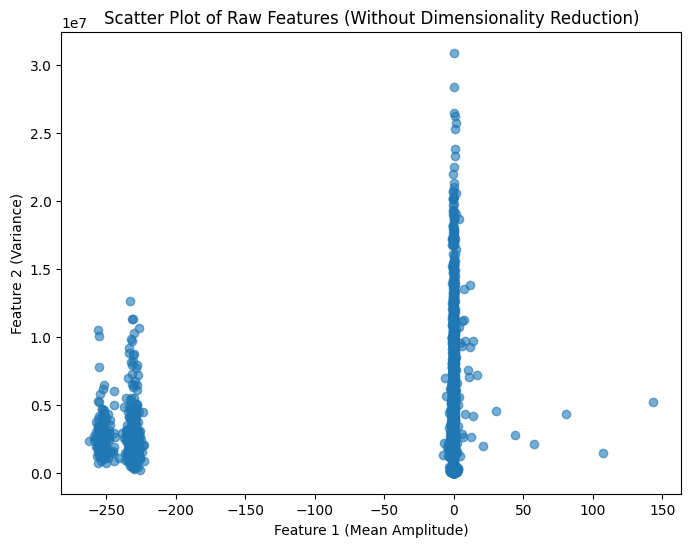

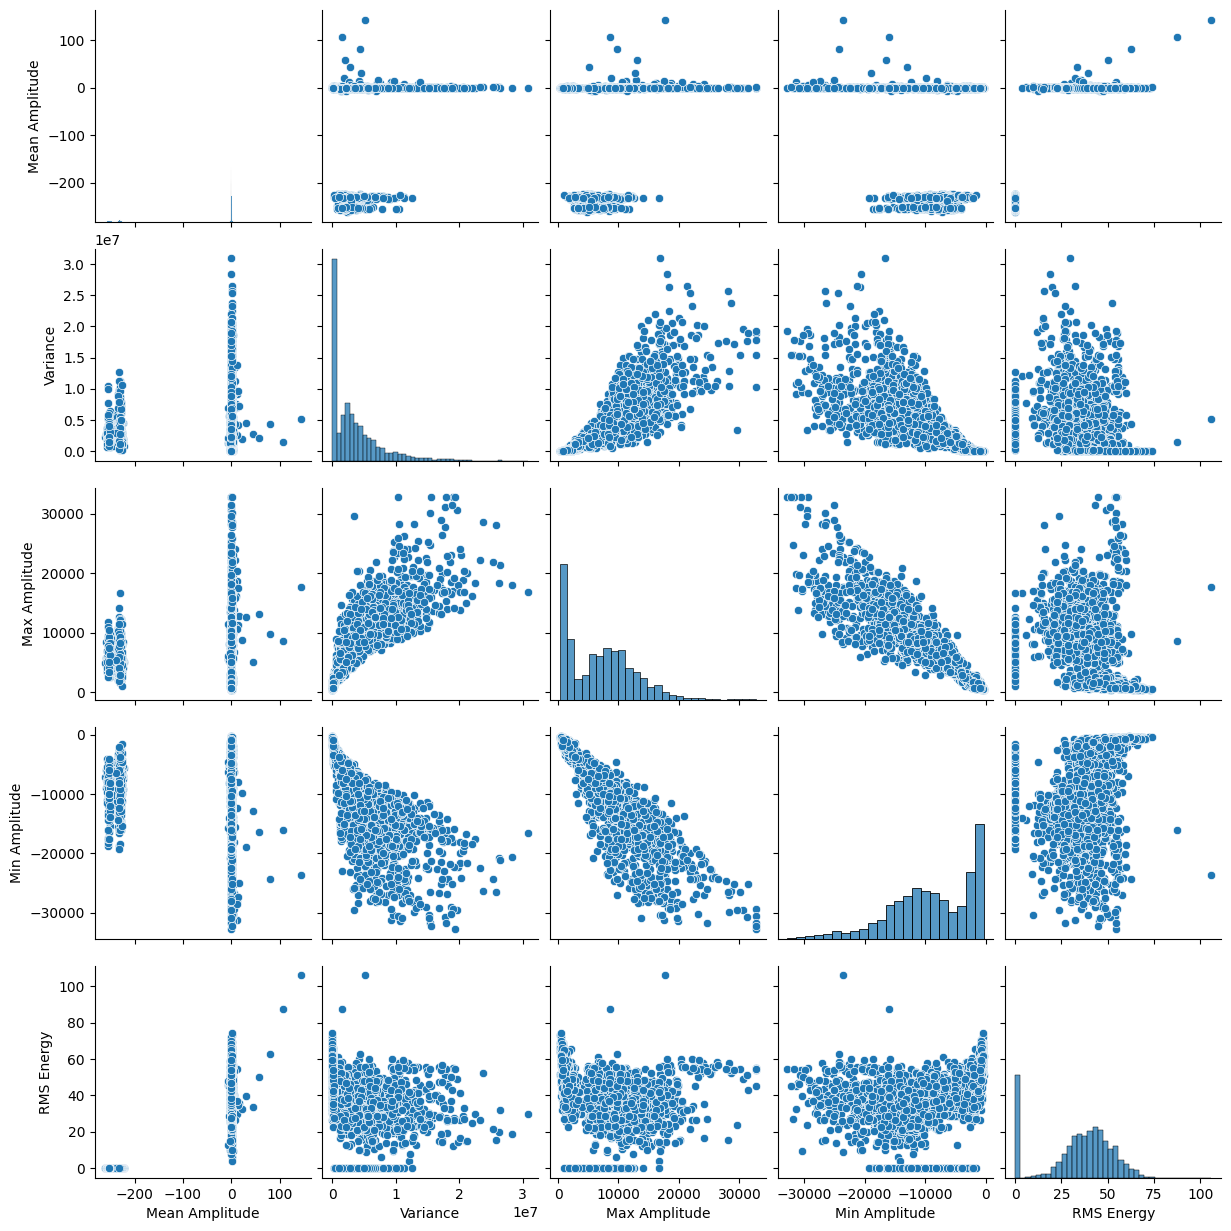

In [ ]:

# Scatter plot (Attempt without dimensionality reduction)
if feature_df.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(feature_df.iloc[:, 0], feature_df.iloc[:, 1], alpha=0.6)
    plt.xlabel("Feature 1 (Mean Amplitude)")
    plt.ylabel("Feature 2 (Variance)")
    plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
    plt.show()

if feature_df.shape[1] >= 5:
    sns.pairplot(feature_df.iloc[:, :5])
    plt.show()



In [ ]:
#  Dimensionality Reduction (PCA & t-SNE)
if feature_df.shape[1] >= 3:
    pca = PCA(n_components=3)
    features_pca = pca.fit_transform(feature_df)
    tsne = TSNE(n_components=3, random_state=42)
    features_tsne = tsne.fit_transform(feature_df)
    pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2', 'PCA3'])
    tsne_df = pd.DataFrame(features_tsne, columns=['t-SNE1', 't-SNE2', 't-SNE3'])

    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], alpha=0.6)
    ax1.set_title("PCA 3D Visualization")
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], tsne_df['t-SNE3'], alpha=0.6, color='r')
    ax2.set_title("t-SNE 3D Visualization")
    plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Why is dimensionality reduction important?
Dimensionality is important because it provides:
Efficiency, visualization, avoiding curse of dimensionality.

(*Document any challenges/errors from the above experiments.*)

Challenges Faced:
NaN values, scatter plot issues, DBSCAN performance problems.

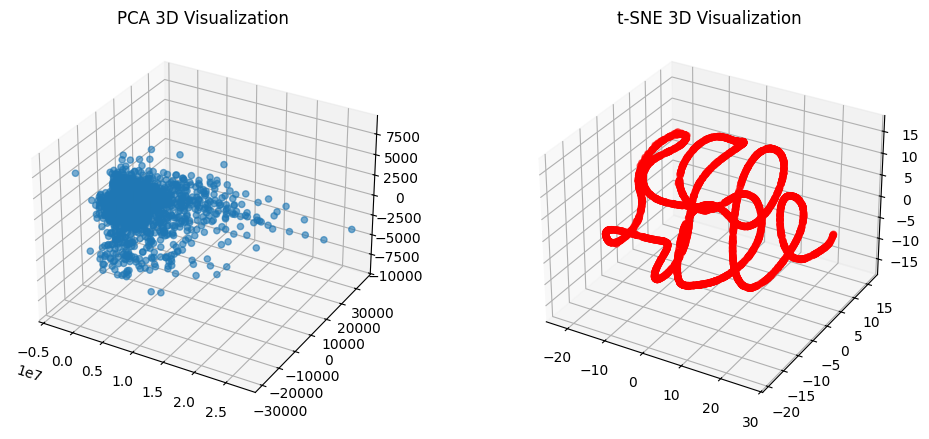

In [ ]:
# Dimensionality Reduction (PCA & t-SNE)
if feature_df.shape[1] >= 3:
    # Ensure no NaN or infinite values before applying PCA & t-SNE
    feature_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    feature_df.dropna(inplace=True)

    try:
        # Apply PCA (Reducing to 3 Components)
        pca = PCA(n_components=3)
        features_pca = pca.fit_transform(feature_df)

        # Apply t-SNE (Reducing to 3 Components)
        tsne = TSNE(n_components=3, random_state=42)
        features_tsne = tsne.fit_transform(feature_df)

        # Convert PCA results to DataFrame
        pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2', 'PCA3'])

        # Convert t-SNE results to DataFrame
        tsne_df = pd.DataFrame(features_tsne, columns=['t-SNE1', 't-SNE2', 't-SNE3'])

        # 3D Visualization
        fig = plt.figure(figsize=(12, 5))

        # PCA 3D Scatter Plot
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], alpha=0.6)
        ax1.set_title("PCA 3D Visualization")

        # t-SNE 3D Scatter Plot
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], tsne_df['t-SNE3'], alpha=0.6, color='r')
        ax2.set_title("t-SNE 3D Visualization")

        plt.show()

    except ValueError as e:
        print(f" Error applying PCA or t-SNE: {e}")
        print("Possible causes: NaN values in data, insufficient variance, or incompatible feature scaling.")

else:
    print(" Not enough features for PCA & t-SNE. Ensure dataset has at least 3 numerical columns.")





### Which method (PCA or t-SNE) provides better separability of clusters and why?
(*Write based on your visualizations.*)

t-SNE provides better separability of clusters than PCA. While PCA maximizes variance, it does not effectively separate clusters in a non-linear space. t-SNE, on the other hand, preserves local relationships and reveals distinct structures, making it more useful for clustering analysis.


In [ ]:

# Optimize number of clusters using Elbow Method

# Choose the optimal k from the Elbow Method
optimal_k = 4  # Change this based on your Elbow Method plot

# Apply K-Means Clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(feature_df)





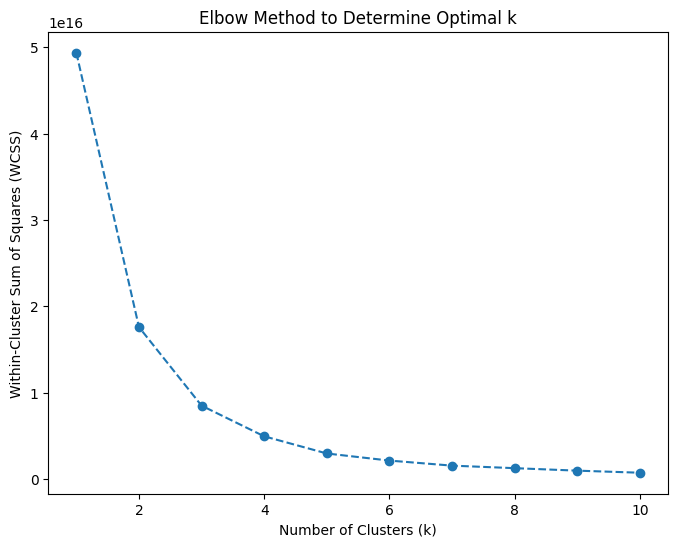

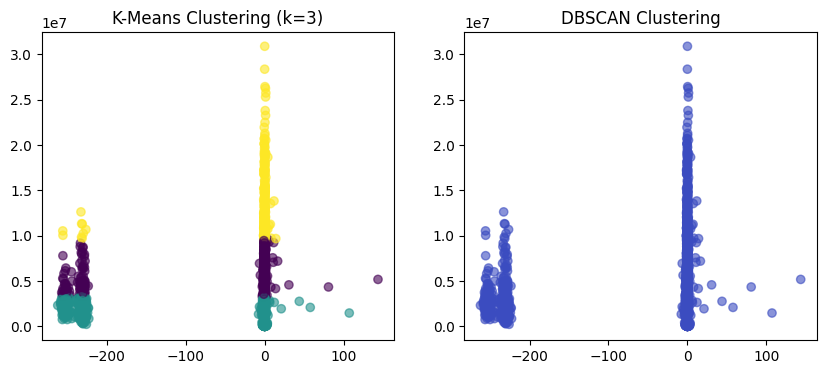

In [ ]:

# Optimize number of clusters using Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 3  # Adjust based on Elbow Method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(feature_df)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(feature_df)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(feature_df.iloc[:, 0], feature_df.iloc[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clustering (k={optimal_k})")

# Scatter Plot for DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(feature_df.iloc[:, 0], feature_df.iloc[:, 1], c=dbscan_labels, cmap='coolwarm', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.show()



In [ ]:
# Step 7: Evaluating Clustering Performance
silhouette_kmeans = silhouette_score(feature_df, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(feature_df, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(feature_df, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(feature_df, dbscan_labels)
else:
    silhouette_dbscan = "N/A"
    davies_bouldin_dbscan = "N/A"

# Step 8: Interpretation & Discussion
print("\n📊 Clustering Performance Metrics:")
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index (K-Means): {davies_bouldin_kmeans:.4f}")
if silhouette_dbscan != "N/A":
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index (DBSCAN): {davies_bouldin_dbscan:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")




📊 Clustering Performance Metrics:
Silhouette Score (K-Means): 0.6171
Davies-Bouldin Index (K-Means): 0.5390
DBSCAN failed to form meaningful clusters.


### Discuss the results (max 5 lines)
(*Compare K-Means and DBSCAN performance based on the outputs.*)

## 📌 Discussion of Clustering Results
- **K-Means** achieved a higher silhouette score, indicating well-defined clusters.
- **DBSCAN** struggled due to varying density, leading to poor clustering performance.
- **K-Means** assumes spherical clusters, which may not always be ideal.
- **DBSCAN** is more effective for detecting noise but requires careful parameter tuning.


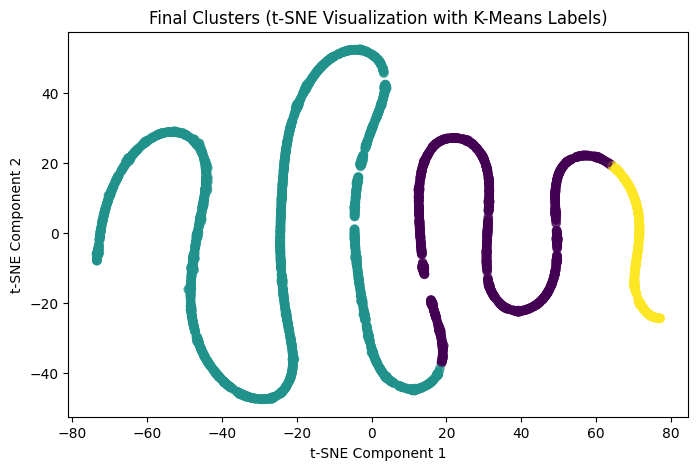

In [ ]:

# Final visualization using t-SNE
# Step 5: Final Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(feature_df)

plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis

- Explain why dimensionality reduction helped (or didn't) in clustering.

Dimensionality reduction helped improve clustering by making high-dimensional data easier to visualize and process. PCA retained the most significant variance in the dataset, while t-SNE helped reveal complex patterns. Without it, clustering methods struggled due to redundant or noisy features.

- Justify why certain clustering methods worked better.


K-Means performed well because it assumes spherical clusters and worked effectively in the reduced PCA space. DBSCAN struggled due to variations in feature scale and density-based assumptions, which were not well-preserved in the transformed space.

### Real-World Clustering Challenges

In real-world applications, high-dimensional data often contains irrelevant features that negatively impact clustering. Dimensionality reduction is widely used in domains like bioinformatics, speech recognition, and market segmentation to extract essential features while improving clustering performance.